In [ ]:
import os
data_path = "/home/zyl/MeVTR_data_and_models/charades/annotation"
subset = "train"

In [76]:
fname = os.path.join(data_path, f'charades_sta_{subset}.txt')
with open(fname, 'r') as f:
    L = f.readlines()

In [8]:
print(L)

[['AO8RW 0.0 6.9', 'a person is putting a book on a shelf.'], ['Y6R7T 20.8 30.0', 'person begins to play on a phone.'], ['Y6R7T 20.8 30.0', 'person start playing on their phone.'], ['Y6R7T 7.3 17.3', 'person pouring it into a glass.'], ['Y6R7T 7.3 17.3', 'the person pours some water into the glass.'], ['Y6R7T 7.3 17.3', 'person pours water into a glass.'], ['IGDIE 22.7 34.0', 'person starts watching television.'], ['7UPGT 13.9 19.7', 'person takes a cup out the fridge.'], ['KBPDM 7.1 13.6', 'person sneezing on a mirror.'], ['KBPDM 0.0 11.1', 'a person is awakening.'], ['KBPDM 3.1 18.7', 'holding a small personal mirror.'], ['IBIWF 0.0 14.5', 'a person is playing with their camera.'], ['372CC 17.5 29.9', 'a person is sitting in front of a computer sneezing.'], ['372CC 17.5 29.9', 'person starts sneezing.'], ['N14BK 39.3 45.0', 'person put a notebook in a bag.'], ['NQT1S 18.3 31.0', 'person all of a sudden they start sneezing.'], ['F1VEE 27.0 32.0', 'person opening a door.'], ['F1VEE 15.

In [77]:
L = [x.strip().split('##') for x in L] 
print(L[0:2])

[['AO8RW 0.0 6.9', 'a person is putting a book on a shelf.'], ['Y6R7T 20.8 30.0', 'person begins to play on a phone.']]


In [12]:
desc = [x[1] for x in L]
print(desc[0:2])

['a person is putting a book on a shelf.', 'person begins to play on a phone.']


In [13]:
L = [x[0].split(' ') for x in L]
print(L[0:2])

[['AO8RW', '0.0', '6.9'], ['Y6R7T', '20.8', '30.0']]


In [ ]:
ID = [x[0] for x in L]
dur = [(float(x[1]), float(x[2])) for x in L]
print(dur[0:2])
print(ID[0:2])

[(0.0, 6.9), (20.8, 30.0)]
['AO8RW', 'Y6R7T']


In [20]:
cnt = 0
for index, x in enumerate(dur):
    if x[0] > x[1]:
        print(index, x)
        cnt += 1
print(cnt)

dur = [(x[1], x[0]) if x[0]>x[1] else (x[0], x[1]) for x in dur]


0


12408


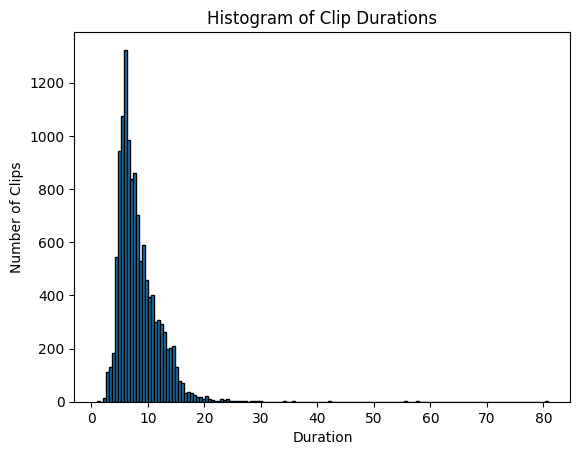

In [101]:
# I want to make a statistics of the duration of the videos, show me the code and the result
print(dur.__len__())

import matplotlib.pyplot as plt

# Assuming 'dur' is a list of tuples where each tuple is (start_time, end_time)
durations = [end - start for start, end in dur]

plt.hist(durations, bins=150, edgecolor='black')
plt.xlabel('Duration')
plt.ylabel('Number of Clips')
plt.title('Histogram of Clip Durations')
plt.show()


In [78]:
# Assuming 'durations' is your list of durations
num = 30
long_durations = list(filter(lambda x: x > num, durations))
count = len(long_durations)

print(f"There are {count} clips with duration larger than {num}.")

There are 10 clips with duration larger than 30.


In [79]:
# Assuming 'durations' is your list of durations
num = 80
long_duration_indices = [i for i, duration in enumerate(durations) if duration > num]

print(f"The indices of clips with duration larger than {num} are: {long_duration_indices}")

for index in long_duration_indices:
    print(ID[index])
    print(desc[index])
    print(dur[index])


The indices of clips with duration larger than 80 are: [10159, 10160, 10161]
5UNDJ
person eating some food.
(98.1, 178.9)
5UNDJ
person took something to eat from out of the bowl.
(98.1, 178.9)
5UNDJ
the person eats the apple.
(98.1, 178.9)


In [80]:
# find all id with 5UNDJ in L
ids_with_5UNDJ = [id for id in L if '5UNDJ' in id[0]]

print(f"IDs with '5UNDJ': {ids_with_5UNDJ}")

IDs with '5UNDJ': [['5UNDJ 98.1 178.9', 'person eating some food.'], ['5UNDJ 98.1 178.9', 'person took something to eat from out of the bowl.'], ['5UNDJ 98.1 178.9', 'the person eats the apple.']]


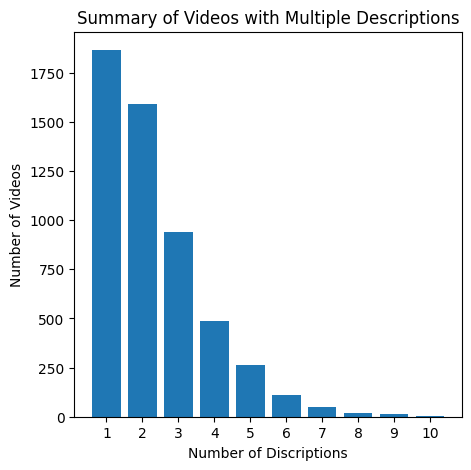

In [54]:
from collections import Counter
import matplotlib.pyplot as plt

# Extract the IDs from L
ids = [item[0].split()[0] for item in L]

# Count the frequencies
id_counts = Counter(ids)

# Prepare data for plotting
counts = Counter(id_counts.values())

# Plot the results
plt.figure(figsize=(5, 5))
plt.bar(counts.keys(), counts.values())
plt.xlabel('Number of Discriptions')
plt.ylabel('Number of Videos')
plt.title('Summary of Videos with Multiple Descriptions')
plt.xticks(list(counts.keys()))
plt.show()

In [81]:
id_counts['5UNDJ']

3

In [ ]:
features_path = "/home/zyl/MeVTR_data_and_models/charades/Charades_v2_3"
video_dict = {}
for root, dub_dir, video_files in os.walk(features_path):
    print(os.path.splitext(video_files[0]))
    for video_file in video_files:
        video_id_ = os.path.splitext(video_file)[0]
        if video_id_ not in ID:
            continue
        file_path_ = os.path.join(root, video_file)
        video_dict[video_id_] = {'video': file_path_, 'sentences': [], 'start': [], 'end': []}


('P73UC', '.mp4')


In [87]:
for i in range(len(ID)):
    if ID[i] not in video_dict:
        continue
    video_dict[ID[i]]['sentences'].append(desc[i])
    video_dict[ID[i]]['start'].append(dur[i][0])
    video_dict[ID[i]]['end'].append(dur[i][1])
print(video_dict['5UNDJ'])

{'video': '/home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1/5UNDJ.mp4', 'sentences': ['person eating some food.', 'person took something to eat from out of the bowl.', 'the person eats the apple.'], 'start': [98.1, 98.1, 98.1], 'end': [178.9, 178.9, 178.9]}


In [108]:
for root, dub_dir, video_files in os.walk(features_path):
    print(video_files)

['P73UC.mp4', 'ZBDB5.mp4', '6IOV0.mp4', 'F8TWE.mp4', 'B0JWB.mp4', 'CK6OL.mp4', 'D2VU8.mp4', 'T96JC.mp4', '4DY90.mp4', 'AEZDA.mp4', 'X2JBJ.mp4', '8U5TE.mp4', 'HP94W.mp4', 'P3JMV.mp4', '6S7M9.mp4', '4PEL7.mp4', '0TDOP.mp4', '1Q6M7.mp4', 'FIAJM.mp4', 'CM293.mp4', 'RYRQT.mp4', 'ABK63.mp4', '29T54.mp4', 'Z3AGB.mp4', 'QO49P.mp4', '651VO.mp4', 'A96EQ.mp4', '7EEF0.mp4', 'TLBWW.mp4', 'TR652.mp4', 'NS216.mp4', '4FD1T.mp4', 'ZUYCL.mp4', '8X49S.mp4', '999BP.mp4', 'P36OC.mp4', 'TRHT1.mp4', 'LZ2Y4.mp4', '6TJVS.mp4', '7AH3L.mp4', 'K90LN.mp4', 'XO97L.mp4', 'DJJ24.mp4', 'WD35N.mp4', 'S16FI.mp4', 'DCLLS.mp4', '9RX96.mp4', 'LJS9V.mp4', 'P0ILN.mp4', 'EOAR1.mp4', 'NALYS.mp4', 'YPUYO.mp4', '4HZ3B.mp4', '4GHHK.mp4', '0F0WE.mp4', 'WJNJJ.mp4', 'L8CC0.mp4', 'ZAIHG.mp4', 'IHGNV.mp4', 'BD0S7.mp4', 'O58M8.mp4', 'JCFFS.mp4', 'MDZVU.mp4', '268ET.mp4', '491X2.mp4', 'VGU6Y.mp4', 'VCU4P.mp4', 'OQ9W3.mp4', '80ADD.mp4', 'QIT2W.mp4', 'DV6U8.mp4', 'G5LEA.mp4', 'X8XQE.mp4', 'P4FXX.mp4', 'B61CP.mp4', 'RJFT8.mp4', 'OTIA2.mp4'

In [102]:
import pandas as pd
subset = "train"
df = pd.read_csv(os.path.join(data_path, f'Charades_v1_{subset}.csv'))


In [106]:
for k in range(len(df)):
    id_ = df.id[k]
    # print(id_)
    # print(df.length[k])

    if id_ == '5UNDJ':
        print(df.length[k])

print(video_dict['5UNDJ'])


194.33
{'video': '/home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1/5UNDJ.mp4', 'sentences': ['person eating some food.', 'person took something to eat from out of the bowl.', 'the person eats the apple.'], 'start': [98.1, 98.1, 98.1], 'end': [178.9, 178.9, 178.9]}


In [ ]:
import torch
import tqdm as notebook_tqdm

resume_model = "/home/zyl/flexibe/output/pytorch_model.bin.4"
checkpoint = torch.load(resume_model, map_location='cpu')
# print(checkpoint.keys())
for key in checkpoint.keys():
    if 'clip' in key:
        print(key)

clip.positional_embedding
clip.text_projection
clip.logit_scale
clip.visual.class_embedding
clip.visual.positional_embedding
clip.visual.proj
clip.visual.conv1.weight
clip.visual.ln_pre.weight
clip.visual.ln_pre.bias
clip.visual.transformer.resblocks.0.attn.in_proj_weight
clip.visual.transformer.resblocks.0.attn.in_proj_bias
clip.visual.transformer.resblocks.0.attn.out_proj.weight
clip.visual.transformer.resblocks.0.attn.out_proj.bias
clip.visual.transformer.resblocks.0.ln_1.weight
clip.visual.transformer.resblocks.0.ln_1.bias
clip.visual.transformer.resblocks.0.mlp.c_fc.weight
clip.visual.transformer.resblocks.0.mlp.c_fc.bias
clip.visual.transformer.resblocks.0.mlp.c_proj.weight
clip.visual.transformer.resblocks.0.mlp.c_proj.bias
clip.visual.transformer.resblocks.0.ln_2.weight
clip.visual.transformer.resblocks.0.ln_2.bias
clip.visual.transformer.resblocks.1.attn.in_proj_weight
clip.visual.transformer.resblocks.1.attn.in_proj_bias
clip.visual.transformer.resblocks.1.attn.out_proj.weigh

In [ ]:
import numpy as np

In [ ]:
from scipy.io import savemat, loadmat
import numpy as np
import numpy as np
import os
import json

mat_path = "/home/zyl/flexible_k/visualize/sim_matrix_with_GT.mat"

result = loadmat(mat_path)

In [2]:
"""    metrics = {
        "sim_matrix": sim_matrix,
        "sim_matrix_mask": sim_matrix_mask,
        "batch_video_paths": batch_video_paths,
        "batch_video_captions": batch_video_captions} 
"""
# print(result["sim_matrix_mask"])

ind_gt = result["sim_matrix_mask"]
sim_matrix = result["sim_matrix"]
video_path_list = result["batch_video_paths"]
video_caption_list = result["batch_video_captions"]

ind_sort = np.argsort(np.argsort(-sim_matrix)) + 1
ind_mask = np.ma.array(ind_gt * ind_sort, mask=ind_gt == 0)

num_list = np.count_nonzero(ind_mask<=1, axis=1)

print(sum(num_list))

36


In [ ]:
print(video_path_list[:3]) # video_path_list`is the path of all the videos
# print(video_caption_list[:3])

# flatten the video_caption_list as a list that contains all the captions in a single dimension, and delete the empty space in string
flattern_caption_list = [] # all captions one by one
caption2path = {} # {video_idx : [caption_idxs]}
path2caption = {} # {caption_idx : video_idx}
for idx, caption_list in enumerate(video_caption_list[0]):
    if idx not in path2caption:
        path2caption[idx] = []
    for caption in caption_list:
        if isinstance(caption, np.ndarray):
            caption = str(caption)
        flattern_caption_list.append(caption.strip())
        path2caption[idx].append(len(flattern_caption_list) - 1) #{video_idx, [caption_idxs]}
        caption2path[len(flattern_caption_list) - 1] = idx # {captioin_idx : video_idx}

print(flattern_caption_list[:3])
print(path2caption[3])
print(caption2path[5])


['/home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1_cp/6IOV0.mp4'
 '/home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1_cp/T96JC.mp4'
 '/home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1_cp/X2JBJ.mp4']
['person working on a laptop.', 'person playing a casual game on their laptop.', 'person drinking a bottle of soda.']
[5, 6, 7, 8, 9]
3


In [ ]:
sorted_indices = np.argsort(-sim_matrix, axis=1) # transform logits to ranking
print(sorted_indices)
top_5_indices = sorted_indices[:, :5]
print("top5", top_5_indices)

[[ 784 1023  270 ...  568 1113  489]
 [1023  270 1036 ...  568 1304  489]
 [  93  706 1100 ...  229  675  580]
 ...
 [ 270 1036  156 ... 1304  568  489]
 [ 961 1055  163 ... 1304  521 1021]
 [ 604  575  342 ... 1262  229 1113]]
top5 [[ 784 1023  270 1036   29]
 [1023  270 1036   94  358]
 [  93  706 1100  342  321]
 ...
 [ 270 1036  156  358  530]
 [ 961 1055  163  416 1277]
 [ 604  575  342  915  944]]


In [ ]:
top_10_indices = sorted_indices[:, :10]
print(sim_matrix[0][top_10_indices[0][0]])

32.392685


In [ ]:
sorted_indices = np.argsort(-sim_matrix, axis=1)
ranks_t2v = np.argsort(sorted_indices, axis=1) +1 

gt_ranks_t2v = ranks_t2v * ind_gt # get ground truth ranks, others are 0

# for text to video (each raw has 1 gt)
gt_ranks_filter_t2v = gt_ranks_t2v[gt_ranks_t2v>0] # filter out the 0s, each raw has 1 gt rank

# count the number of ranks that are smaller than 1
num_t2v = np.count_nonzero(gt_ranks_filter_t2v<=5)
print(num_t2v)

133


In [ ]:
ind_gt_t = ind_gt.T
ranks_v2t = np.argsort(np.argsort(-sim_matrix.T)) + 1

gt_ranks_v2t = []
for row_idx, row in enumerate(ind_gt_t):
    gt_indx = np.where(row == 1)[0]
    gt_ranks_new = ranks_v2t[row_idx][gt_indx]
    gt_ranks_v2t.append(gt_ranks_new)  # get the ground truth ranks for each video

print(gt_ranks_v2t[:3])

[array([  22,  326, 1352]), array([643]), array([6]), array([1613,   49, 1207,  347, 2227]), array([1604,   59]), array([226, 163,   1]), array([  30, 1267]), array([408, 224]), array([  15,  776,   13, 3052]), array([1938, 2613,  315, 1148]), array([230]), array([2211]), array([ 661,  551,  149, 1314, 3595]), array([ 865,    3,  835, 1496]), array([1349]), array([157]), array([  80, 2669]), array([ 332, 2365,  667, 2223]), array([1183, 2394,  622, 1977]), array([1333]), array([104,  22,   3]), array([430, 178]), array([2094,  543, 1514, 1488,  818]), array([371, 921]), array([1596,  146,  285, 1123]), array([1709, 2232]), array([410]), array([2180]), array([ 380, 2722, 1421,  680,  655, 1527, 1474]), array([1495,  305,  243]), array([1172]), array([1558, 1552,  113,  145, 1901, 3059]), array([1198,  608,  928,  401]), array([2484,  164, 2114]), array([2524,  682,  550,  698,  546,  389, 2269, 2132]), array([1586, 3439]), array([ 753,    1, 1139,  552]), array([3440, 2654]), array([335

In [30]:
print(ind_gt.shape)

(3720, 1334)


In [9]:

def process_t2v(sim_matrix, ind_gt):
    # 计算排名
    ind_sort = np.argsort(-sim_matrix, axis=1)
    top_10_indices = ind_sort[:, :10]
    ranks = np.argsort(ind_sort, axis=1) + 1
    gt_indices = np.argmax(ind_gt, axis=1)  # GT 的索引
    gt_ranks = np.take_along_axis(ranks, gt_indices[:, None], axis=1).flatten()  # GT 的排名

    # 构造 JSON
    t2v_results = []
    for i in range(len(sim_matrix)):
        t2v_results.append({
            "index": i,
            "top_10_indices": top_10_indices[i].tolist(),
            "gt_index": int(gt_indices[i]),
            "gt_rank": int(gt_ranks[i]),
            "gt_in_rank_1": bool(gt_ranks[i] == 1),
            "gt_in_rank_10": bool(gt_ranks[i] <= 10)
        })
    return t2v_results

def process_v2t(sim_matrix, ind_gt):
    # 转置矩阵以便于处理列
    sim_matrix_T = sim_matrix.T
    ind_gt_T = ind_gt.T

    # 计算排名
    ind_sort_T = np.argsort(-sim_matrix_T, axis=1)
    top_10_indices_T = ind_sort_T[:, :10]
    ranks_T = np.argsort(ind_sort_T, axis=1) + 1

    # 构造 JSON
    v2t_results = []
    for i in range(len(sim_matrix_T)):
        gt_indices = np.where(ind_gt_T[i] == 1)[0]  # GT 的索引们
        gt_ranks = ranks_T[i, gt_indices]  # GT 的排名们

        v2t_results.append({
            "index": i,
            "top_10_indices": top_10_indices_T[i].tolist(),
            "gt_indices": gt_indices.tolist(),
            "gt_ranks": gt_ranks.tolist(),
            "gt_in_rank_1": bool(any(rank == 1 for rank in gt_ranks)),
            "gt_in_rank_10": bool(any(rank <= 10 for rank in gt_ranks))
        })
    return v2t_results

In [11]:
t2v_results = process_t2v(sim_matrix, ind_gt)
v2t_results = process_v2t(sim_matrix, ind_gt)

# 构造最终的 JSON
final_json = {
    "text_to_video": t2v_results,
    "video_to_text": v2t_results,
    "caption_to_path": caption2path,
    "path_to_caption": path2caption
}

print(final_json["path_to_caption"][1])



[3]


In [13]:
output_root = "/home/zhengwei/Desktop/Zhengwei/Projects/MEV2T/outputs/testbase0129"
json_path = os.path.join(output_root, "rank_results0206.json")
json.dump(final_json, open(json_path, "w"), indent=4)

In [3]:
# load json
json_path = "/home/zhengwei/Desktop/Zhengwei/Projects/MEV2T/outputs/testbase0129/rank_results0206.json"
final_json = json.load(open(json_path, "r"))

In [15]:
t2v_results = final_json['text_to_video']
v2t_results = final_json['video_to_text']
caption2path = final_json['caption_to_path']
path2caption = final_json['path_to_caption']

In [26]:
from IPython.display import Video


# Replace 'path_to_your_video.mp4' with the actual path to your video file
video_path_test = []
caption_test = []
for item in t2v_results:
    if item['gt_in_rank_1']:
        print(item)
        print("Query:", flattern_caption_list[item['index']])
        video_path_test.append(video_path_list[item['gt_index']])
        caption_test.append(path2caption[item['gt_index']])
        for idx in item['top_10_indices']:
            video_path_test.append(video_path_list[idx])
            caption_test.append(path2caption[idx])
        break

for idx, captions in enumerate(caption_test):
    if idx == 0:
        print("GT Video:", video_path_test[idx])
        print("GT Captions:")
        for caption in captions:
            print(flattern_caption_list[caption])
    else:
        print("Rank@{} video: ".format(idx), video_path_test[idx])
        print("Captions for the video:")
        for caption in captions:
            print(flattern_caption_list[caption])

{'index': 14, 'top_10_indices': [5, 1131, 333, 428, 939, 335, 354, 355, 810, 465], 'gt_index': 5, 'gt_rank': 1, 'gt_in_rank_1': True, 'gt_in_rank_10': True}
Query: a person is reading a book in the laundry room.
GT Video: /home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1_cp/TR652.mp4
GT Captions:
the person takes a pillow from the shelf.
person reading book.
a person is reading a book in the laundry room.
Rank@1 video:  /home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1_cp/TR652.mp4
Captions for the video:
the person takes a pillow from the shelf.
person reading book.
a person is reading a book in the laundry room.
Rank@2 video:  /home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1_cp/J1MMG.mp4
Captions for the video:
person they stand up.
person put it back on the shelf.
Rank@3 video:  /home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1_cp/7RXMM.mp4
Captions for the video:
a person sits in a chair.
the perso

In [47]:
caption_for_show = []
caption_gt = []
for item in final_json['video_to_text']:
    if item['index'] == 5:
        print(item)
        for idx in item["top_10_indices"]:
            caption_for_show.append(flattern_caption_list[idx])
        for idx in item["gt_indices"]:
            caption_gt.append(flattern_caption_list[idx])
        break

print("======GT======")
for idx in caption_gt:
    print(idx)
print("======Result======")
for idx in caption_for_show:
    print(idx)

{'index': 5, 'top_10_indices': [14, 3660, 1878, 2274, 2160, 2194, 71, 1571, 2995, 651], 'gt_indices': [12, 13, 14], 'gt_ranks': [226, 163, 1], 'gt_in_rank_1': True, 'gt_in_rank_10': True}
======GT======
the person takes a pillow from the shelf.
person reading book.
a person is reading a book in the laundry room.
======Result======
a person is reading a book in the laundry room.
a person sits on the floor reading a book.
person knees takes a book from a cabinet.
a person in a kitchen reads from a book.
person sitting on the floor looking into a cabinet.
that same person puts the book down on the floor.
person opens a book over their head.
person takes a book out from the entertainment center.
a person awakens in their dining room holding a book.
person takes a book off a shelf.


In [30]:
base_root='/home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1_cp/'
caption_for_show = []
caption_gt = []

video_path_test = []
caption_test = []

query_video = "4H64T.mp4"
# query_video = "TR652.mp4"

for item in v2t_results:
    if video_path_list[item['index']] == base_root+query_video:
        print(item)
        print("Query:", video_path_list[item['index']])
        for idx in item["top_10_indices"]:
            caption_for_show.append(flattern_caption_list[idx])
            video_path_test.append(caption2path[idx])
        for idx in item["gt_indices"]:
            caption_gt.append(flattern_caption_list[idx])
        break
    else:
        continue

print("======GT======")
for idx in caption_gt:
    print(idx)
print("======Result======")
for idx, caption in enumerate(caption_for_show):
    print("Rank@{} caption: ".format(idx+1), caption)
    print("Video for the caption:", video_path_list[video_path_test[idx]])

{'index': 1290, 'top_10_indices': [1857, 19, 2355, 3076, 3228, 1044, 1024, 3409, 123, 1448], 'gt_indices': [3581, 3582, 3583, 3584, 3585], 'gt_ranks': [2722, 802, 98, 3622, 81], 'gt_in_rank_1': False, 'gt_in_rank_10': False}
Query: /home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1_cp/4H64T.mp4
======GT======
person eating some leftovers from a take-out carton.
person takes out some food.
person opens a refrigerator.
person start to eat the food with a plastic fork.
person opens the refrigerator.
======Result======
Rank@1 caption:  a person standing in a kitchen takes off a sweatshirt.
Video for the caption: /home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1_cp/28BVI.mp4
Rank@2 caption:  person runs to the kitchen.
Video for the caption: /home/zhengwei/Desktop/Zhengwei/Projects/datasets/Charades/Charades_v1_cp/LZ2Y4.mp4
Rank@3 caption:  a person by the refrigerator was eating.
Video for the caption: /home/zhengwei/Desktop/Zhengwei/Projects/datase